<a href="https://colab.research.google.com/github/s-omidikia/computer-vision/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chess Piece Detection Using Transfer Learning With YOLOv5 Network**

##**Import libraries**

In [1]:
import torch
import torchvision
from google.colab import drive
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**Setup**

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12513, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 12513 (delta 33), reused 40 (delta 18), pack-reused 12448
Receiving objects: 100% (12513/12513), 12.27 MiB | 32.04 MiB/s, done.
Resolving deltas: 100% (8625/8625), done.


In [4]:
!pip install -r /content/yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 28.0 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 1.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, 

##**Loading the  chess dataset**

In [5]:
!unzip -q /content/gdrive/MyDrive/Chess.zip -d chess

In [6]:
!cp /content/chess/chess.yaml /content/yolov5/data

## **Training**

In [7]:
# Train YOLOv5s on chess dataset for 10 epochs
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data chess.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=chess.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

## **Inference**

In [8]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/chess/test/images 

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/chess/test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/29 /content/chess/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 640x640 1 white-pawn, Done. (0.014s)
image 2/29 /content/chess/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 640x640 1 white-pawn, Done. (0.014s)
image 3/29 /conte

##**Visualizing results**

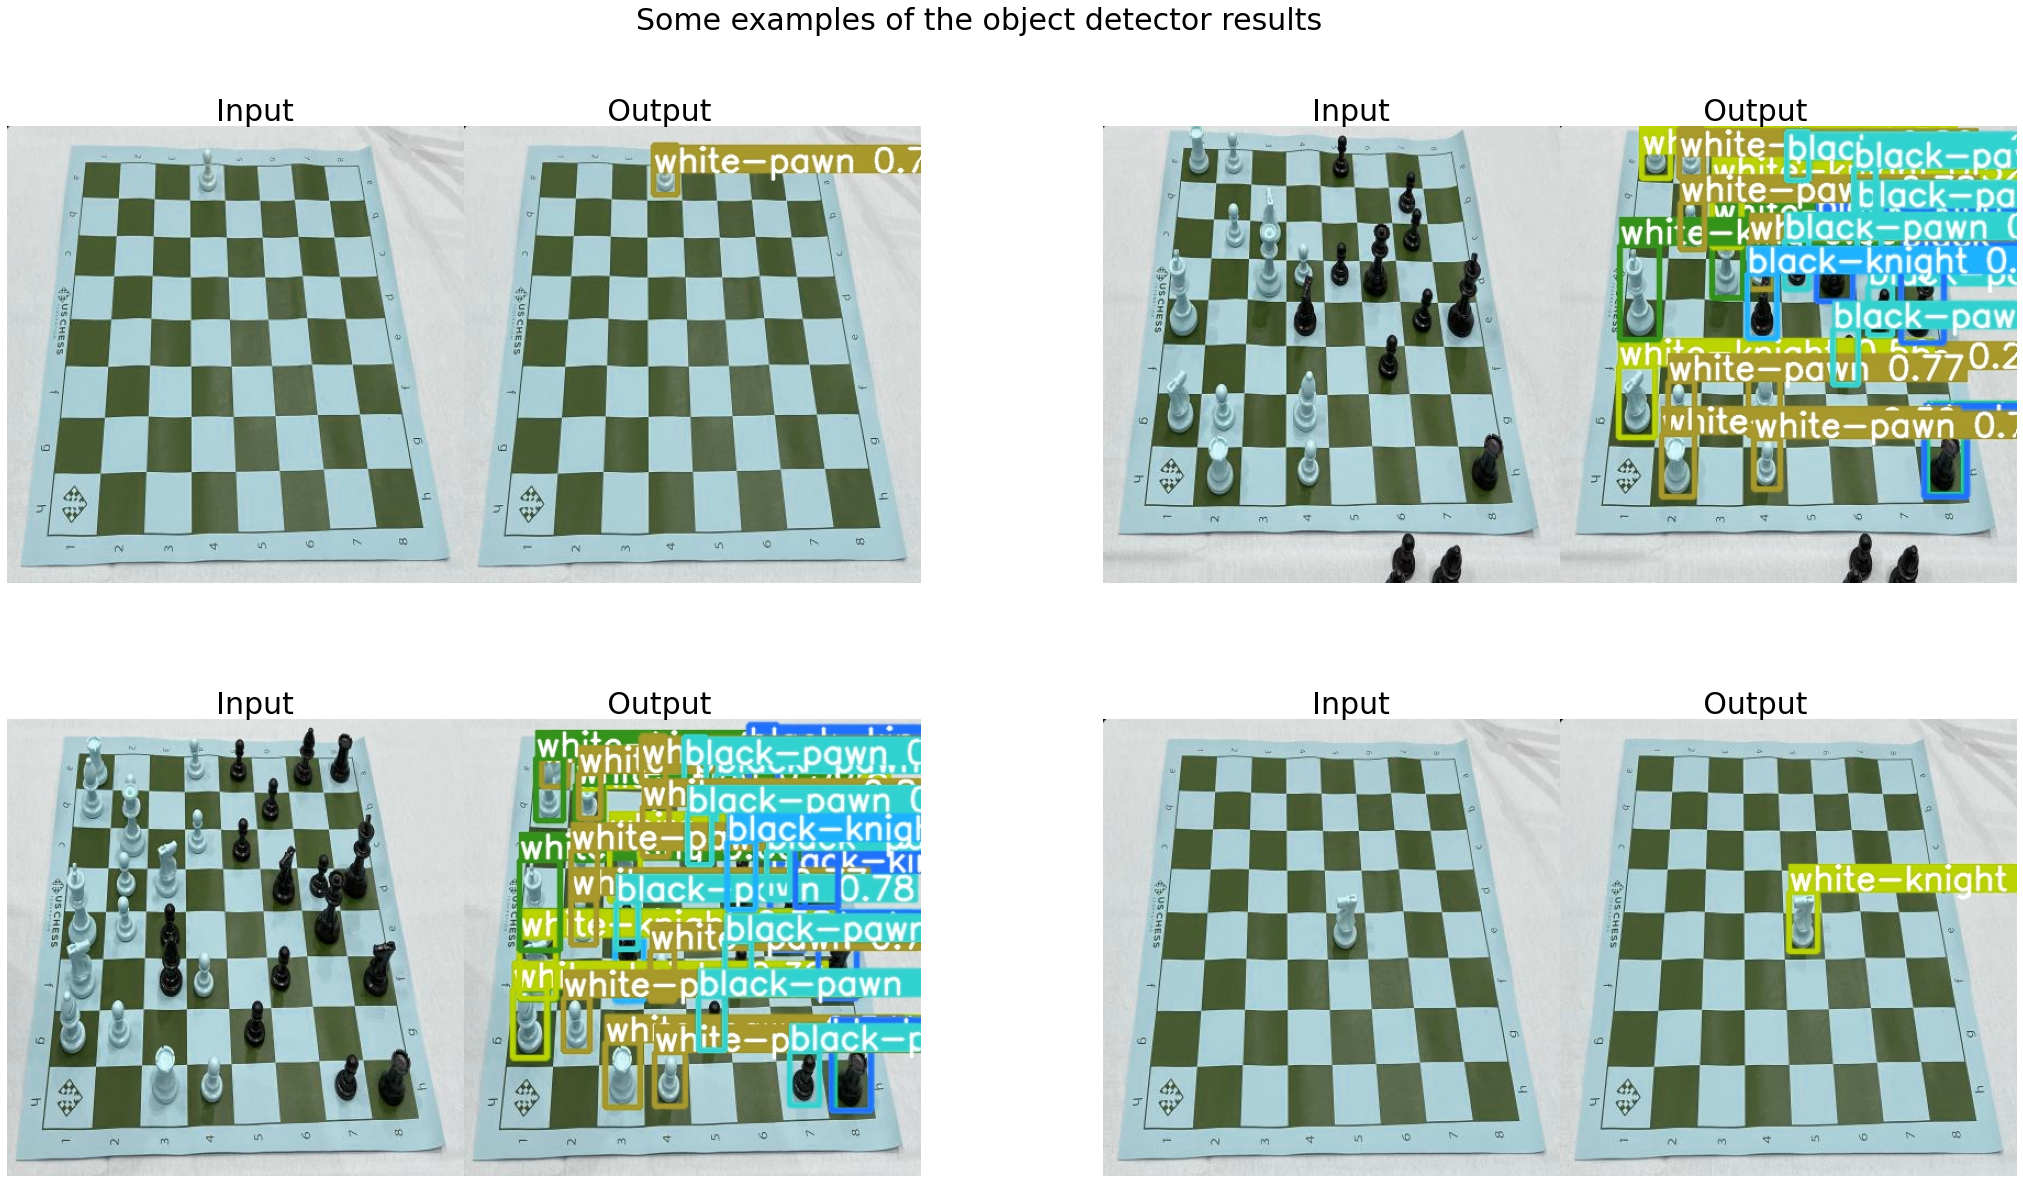

In [9]:
plt.figure(figsize=(36, 20))
#plt.subplots_adjust(hspace=0.5)
plt.suptitle("Some examples of the object detector results", fontsize=30, y=0.95)

test_images = glob.glob('/content/chess/test/images/*')
prediction_images = glob.glob('/content/yolov5/runs/detect/exp/*')

ziped_list = list(zip(test_images[16:20],prediction_images[16:20]))

for n, data in enumerate(ziped_list):
    im_test = cv2.imread(data[0])
    im_predict = cv2.imread(data[1])
    result = np.concatenate((im_test,im_predict),axis=1)
    ax = plt.subplot(2, 2, n + 1)
    plt.title("Input                                 Output", fontsize=30)
    plt.imshow(result)
    plt.axis('off')

plt.show()



(-0.5, 2999.5, 2249.5, -0.5)

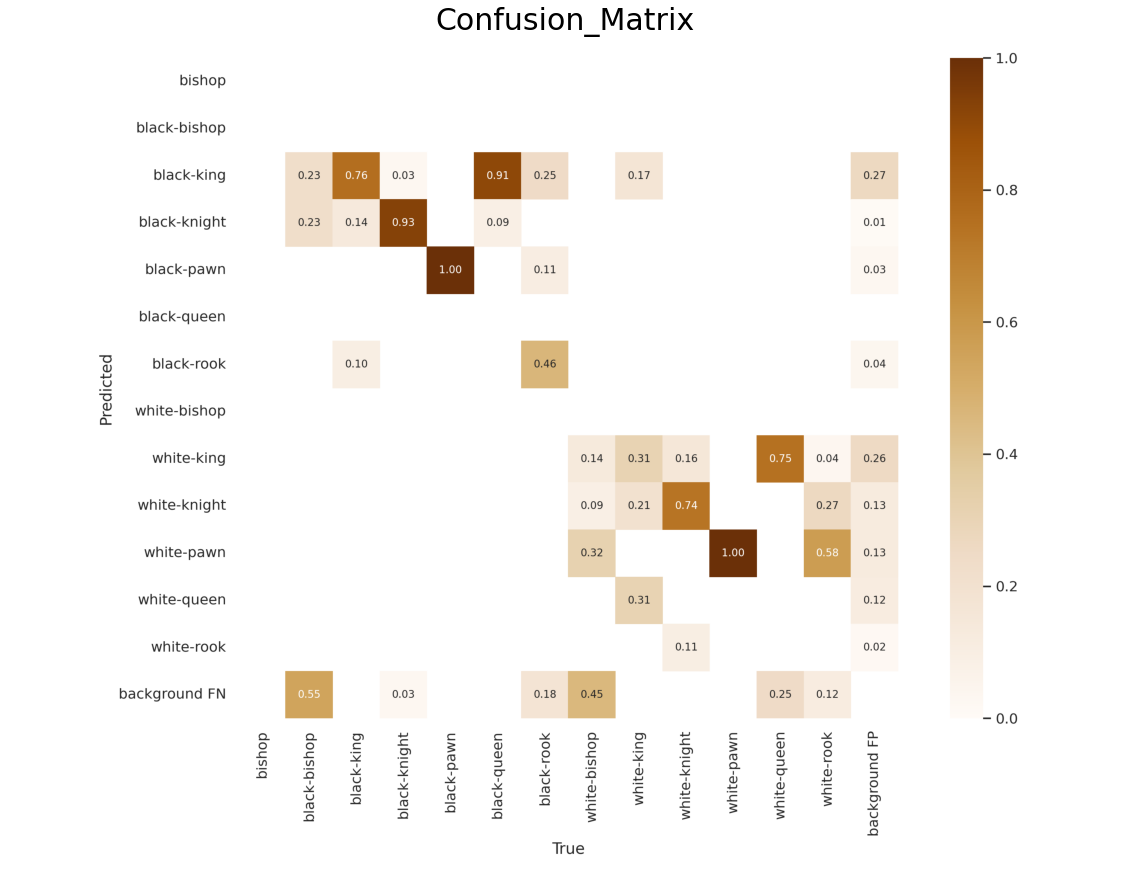

In [10]:
plt.figure(figsize=(20, 20))
plt.title('Confusion_Matrix', fontsize=30)
plt.imshow(cv2.imread('/content/yolov5/runs/train/exp/confusion_matrix.png'))
plt.axis('off')

(-0.5, 2399.5, 1199.5, -0.5)

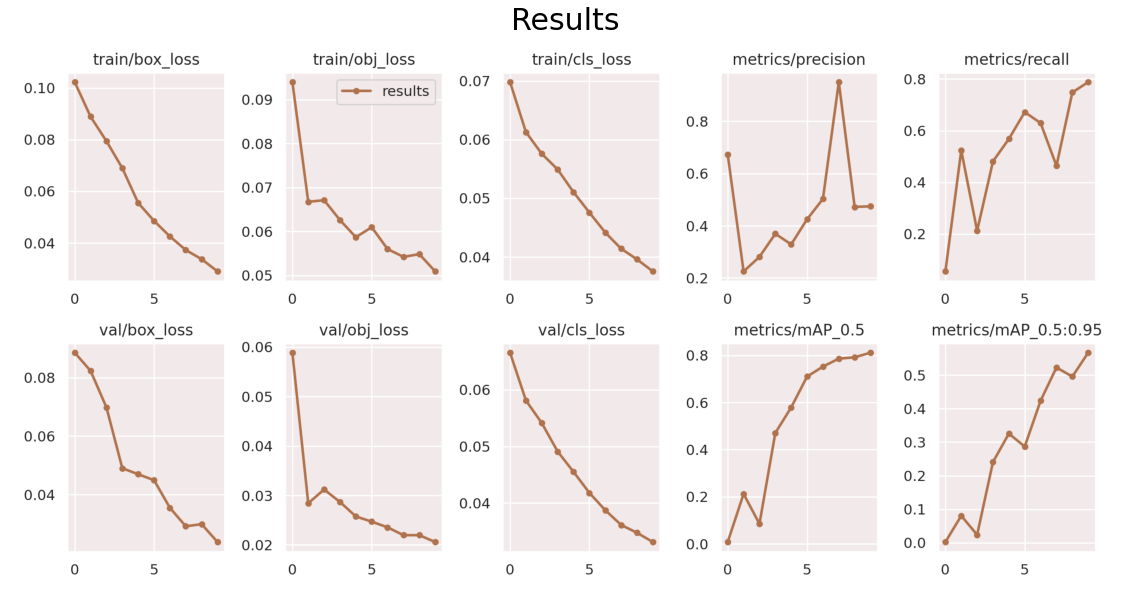

In [11]:
plt.figure(figsize=(20, 20))
plt.title('Results', fontsize=30)
plt.imshow(cv2.imread('/content/yolov5/runs/train/exp/results.png'))
plt.axis('off')